<a href="https://colab.research.google.com/github/MamatkulovBunyodbek1999/My-portfoilio-samples/blob/main/Manual_Linear_Regression_Tashkent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science and Artificial intelligence Praktikum

## 5-MODUL. Machine Learning. 

### Linear Regression

In [102]:
import pandas as pd 
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv', index_col=0)   # Importing data
df.head(10)

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
7,Яккасарайский,2,32.0,5,5,20000.0
8,Учтепинский,2,51.0,3,4,26200.0
9,Чиланзарский,1,30.0,1,4,22200.0


#Value counts in district column

In [77]:
df['district'].value_counts()

Чиланзарский         1616
Мирзо-Улугбекский    1342
Учтепинский           872
Юнусабадский          847
Мирабадский           717
Яккасарайский         628
Яшнободский           456
Шайхантахурский       356
Олмазорский           262
Сергелийский          159
Янгихаётский           15
Бектемирский            8
Name: district, dtype: int64

# Separating a certain column from DataFrame

In [78]:
housing = df[df.district=='Чиланзарский']
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


#Creating a new variable and converting it into numpy array

In [79]:
X = housing['size'].to_numpy()
X

array([42., 65., 70., ..., 32., 70., 30.])

In [80]:
y = housing['price'].to_numpy()
y

array([37000., 49500., 55000., ..., 28000., 49800., 22914.])

# Let's have a look at our data by using visualization tools

In [103]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

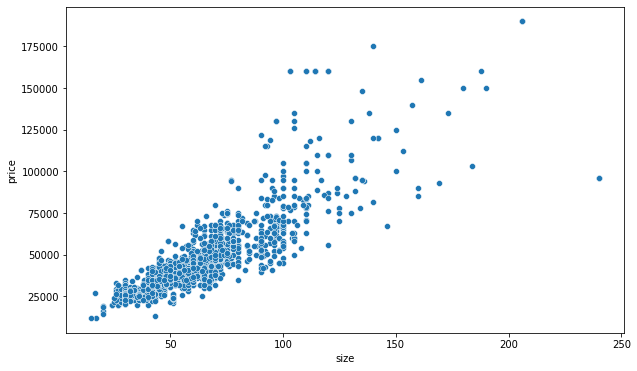

In [104]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.show()

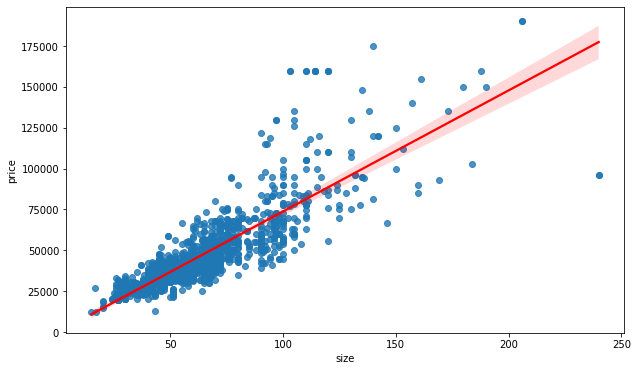

In [105]:
plt.figure(figsize=(10,6))
sns.regplot(data=housing, x='size', y='price', line_kws={"color": "red"})
plt.show()

In [106]:
X

array([42., 65., 70., ..., 32., 70., 30.])

In [107]:
y

array([37000., 49500., 55000., ..., 28000., 49800., 22914.])

## 1-Task

Our task is to calculate the coefficients $\theta_0$ and $\theta_1$ using the following formula from the above variables `X` and `y`.

![Imgur](https://i.imgur.com/zZoXZxI.png)

Here $\tilde{x}$ is the average value for column `X`, $\tilde{y}$ is the average value for column `y`

In [108]:
import numpy as np
Xmean = np.mean(X)
ymean = np.mean(y)

In [109]:
theta1 = sum((X-Xmean)*(y-ymean))/sum((X-Xmean)**2)
theta1

740.0264822713287

In [110]:
theta0 = ymean - theta1*Xmean
theta0

-195.94911352690542

## 2-Task

Extract several random values ​​from ``X'' and calculate the corresponding ``y'' using the above coefficients.

![Imgur](https://i.imgur.com/iT5tffj.png)

In [111]:
x_test = housing.sample(10, random_state=42)['size'].to_numpy()
y_test = housing.sample(10, random_state=42)['price'].to_numpy()
print(x_test)
print(y_test)

[54. 42. 36. 60. 48. 68. 38. 65. 52. 44.]
[37500. 26500. 25500. 39000. 32500. 34500. 22700. 47000. 37900. 36000.]


In [112]:
y_predict = theta0 + theta1*x_test
y_predict

array([39765.48092912, 30885.16314187, 26445.00424824, 44205.63982275,
       35325.3220355 , 50125.85168092, 27925.05721278, 47905.77223411,
       38285.42796458, 32365.21610641])

## 3-Task


Calculate RMSE (root mean square error), MAE (mean absolute error) between calculated and original values.

![Imgur](https://i.imgur.com/GJH9CGy.png)

![Imgur](https://i.imgur.com/aXL9iWa.png)

# Calculatin MAE -> MEAN ABSOLUTE ERROR

In [113]:
#MAE
MAE = np.sum(np.absolute(y_predict-y_test))/len(y_test)
MAE

4140.35031634715

# CALCULATING ROOT MEAN SQUARE ERROR

In [114]:
#RMSE
RMSE = np.sqrt(np.sum((y_predict - y_test)**2)/len(y_test))
RMSE

5882.051673173715